In [256]:
#------------------------------------------------------------------
# Tutorial K Nearest neighbor :Classification
#------------------------------------------------------------------
#----import data-----------
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
 'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Sample code'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [257]:
#---------------
# Find Missing value
#--------------
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))



Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [258]:
#-----------------------------------
# prepare data1: replace missing with median
#-------------------------------
data1=data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')
print(data1[20:25])


After replacing missing values:
    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20                7                        3                         2   
21               10                        5                         5   
22                3                        1                         1   
23                8                        4                         5   
24                1                        1                         1   

    Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
20                 10                            5          10   
21                  3                            6           7   
22                  1                            2           1   
23                  1                            2           1   
24                  1                            2           1   

    Bland Chromatin  Normal Nucleoli  Mitoses  Class  
20                5                4        4      4  
21             

In [259]:
#------------------------------
# prepare data2 : drop missing row
#------------------------------
print('Number of rows in original data = %d' % (data.shape[0]))
data2 = data.dropna()
print('Number of rows after discarding missing values = %d' % (data2.shape[0]))

Number of rows in original data = 699
Number of rows after discarding missing values = 683


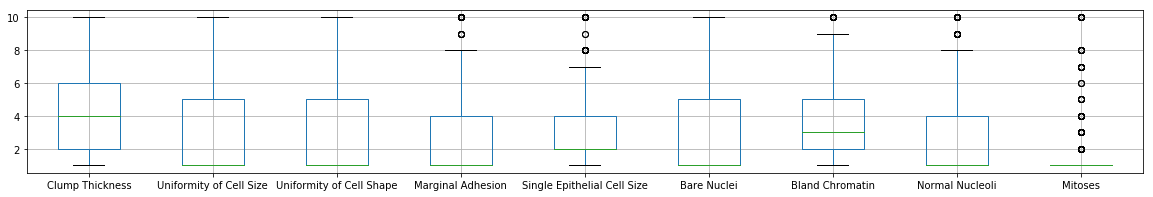

In [260]:
#--------------------------------
# Check Outliner for data1
# boxplot: data_box_data1
#-------------------------------
%matplotlib inline
data_box_data1 = data1.drop(['Class'],axis=1)
data_box_data1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
data_box_data1.boxplot(figsize=(20,3))

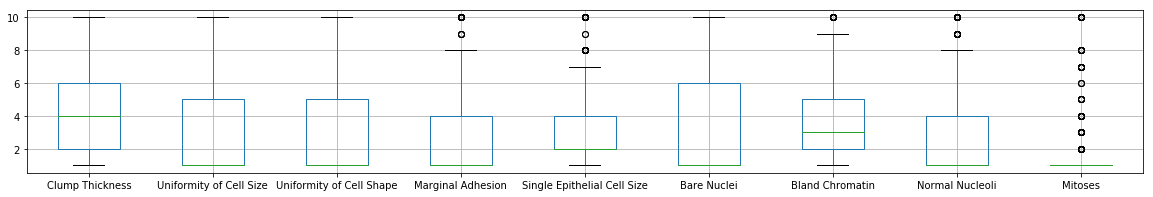

In [261]:
#--------------------------------
# Check Outliner for data2
# boxplot: data_box_data2
#-------------------------------
%matplotlib inline
data_box_data2 = data2.drop(['Class'],axis=1)
data_box_data2['Bare Nuclei'] = pd.to_numeric(data_box_data2['Bare Nuclei'])
data_box_data2.boxplot(figsize=(20,3))

In [262]:
#print(data_box_data1.std())
#print(data_box_data2.std())
#print(data_box_data1)
#print(data_box_data2)

In [263]:
#--------------------------------
# Manage outliner by compute Z SCORE
# compute Z SCORE : for data1 , data2
# ignore data : Z SCORE < 3 AND Z SCORE >=3
#-------------------------------
Z_data1 = (data_box_data1-data_box_data1.mean())/data_box_data1.std()
Z_data1[20:25]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.798376,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.970088,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,-0.686488,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.686488,-0.179534,-0.611387,-0.343666


In [264]:
Z_data2 = (data_box_data2-data_box_data2.mean())/data_box_data2.std()
Z_data2[20:25]


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.906788,-0.049200,-0.406623,2.502944,0.794274,1.771569,0.634734,0.370269,1.383283
21,1.970331,0.603298,0.597198,0.059290,1.244099,0.948266,1.451161,2.335764,-0.348145
22,-0.511269,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.589908,-0.612478,-0.348145
24,-1.220297,-0.701698,-0.741230,-0.638897,-0.555202,-0.698341,-0.181694,-0.612478,-0.348145
25,0.197760,-0.375449,-0.072016,0.408383,-0.555202,0.948266,-0.181694,1.025434,-0.348145


In [265]:
Z1 = Z_data1.loc[((Z_data1 > -3).sum(axis=1)==9) & ((Z_data1 <= 3).sum(axis=1)==9),:]
print('Number of rows = %d' % (Z1.shape[0]))

Number of rows = 648


In [266]:
Z2 = Z_data2.loc[((Z_data2 > -3).sum(axis=1)==9) & ((Z_data2 <= 3).sum(axis=1)==9),:]
print('Number of rows = %d' % (Z2.shape[0]))

Number of rows = 632


In [267]:
#-----------------------------------------------
# Data1 :
# Prepare data for create Classification Model
# data1 : split training data , testing data
#----------------------------------------------
data1_x = data1.drop(['Class'],axis=1)
print('Number of instances = %d' % (data1_x.shape[0]))
print('Number of attributes = %d' % (data1_x.shape[1]))
data1_x.head()

data1_y = data1['Class']
print('Number of instances = %d' % (data1_y.shape[0]))
#print('Number of attributes = %d' % (data1_y.shape[1]))
data1_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

Number of instances = 699
Number of attributes = 9
Number of instances = 699


In [268]:
#data1_y

[0.9781021897810219, 0.9708029197080292, 0.948905109489051, 0.948905109489051, 0.9416058394160584, 0.9416058394160584, 0.9416058394160584]
0.9530761209593326


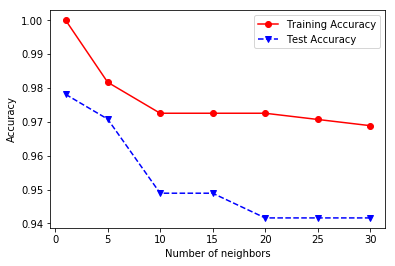

In [284]:
#--------------------------------------------------
# Classification : KNeighborsClassifier
# for Fill-in missing
#---------------------------------------------------
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30] 
trainAcc_knnd1 = []
testAcc_knnd1 = []
for k in numNeighbors:
 clf_knnd1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
 clf_knnd1.fit(X_train, Y_train)
 Y_predTrain_knnd1 = clf_knnd1.predict(X_train)
 Y_predTest_knnd1 = clf_knnd1.predict(X_test)
 trainAcc_knnd1.append(accuracy_score(Y_train, Y_predTrain_knnd1))
 testAcc_knnd1.append(accuracy_score(Y_test, Y_predTest_knnd1))
plt.plot(numNeighbors, trainAcc_knnd1, 'ro-', numNeighbors, testAcc_knnd1,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knnd1)
print(np.mean(testAcc_knnd1))

Number of instances = 683
Number of attributes = 9
Number of instances = 683
[0.9781021897810219, 0.9708029197080292, 0.948905109489051, 0.948905109489051, 0.9416058394160584, 0.9416058394160584, 0.9416058394160584]
0.9530761209593326


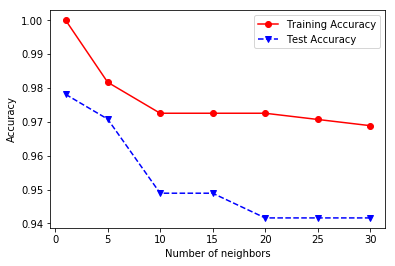

In [283]:
#-----------------------------------------------
# Data2 :
# Prepare data for create Classification Model
# data1 : split training data , testing data
#----------------------------------------------
data2_x = data2.drop(['Class'],axis=1)
print('Number of instances = %d' % (data2_x.shape[0]))
print('Number of attributes = %d' % (data2_x.shape[1]))
data2_x.head()
data2_y = data2['Class']
print('Number of instances = %d' % (data2_y.shape[0]))
#print('Number of attributes = %d' % (data2_y.shape[1]))
data2_y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2_x, data2_y, test_size = 0.2,random_state = 0)

#--------------------------------------------------
# Classification : KNeighborsClassifier
# for Ignored missing
#---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knnd2 = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knnd2.append(accuracy_score(Y_test,Y_predTest_knnd2))

#print(Y_predTrain_knnd2)

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knnd2,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knnd2)
print(np.mean(testAcc_knnd2))

[0.9461538461538461, 0.9769230769230769, 0.9615384615384616, 0.9692307692307692, 0.9692307692307692, 0.9692307692307692, 0.9615384615384616]
0.9648351648351648


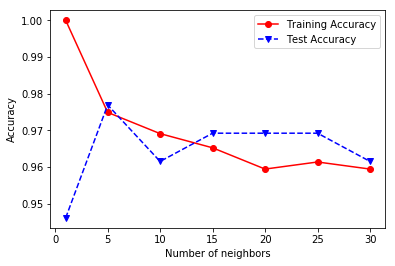

In [282]:
#-----------------------------------------------
# K-NN with Fill-in Missing + Managing Outlier
#----------------------------------------------
AC1 = data1.drop(['Class'],axis=1)
AC1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
#manging
Z_AC1 = (AC1-AC1.mean())/AC1.std()
Z1 = data1.loc[((Z_AC1 > -3).sum(axis=1)==9) & ((Z_AC1 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

#---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndC = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndC.append(accuracy_score(Y_test,Y_predTest_knnd2))

#print(Y_predTrain_knnd2)

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndC,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndC)
print(np.mean(testAcc_knndC))

[0.9212598425196851, 0.9606299212598425, 0.9606299212598425, 0.9606299212598425, 0.952755905511811, 0.9606299212598425, 0.9606299212598425]
0.9538807649043869


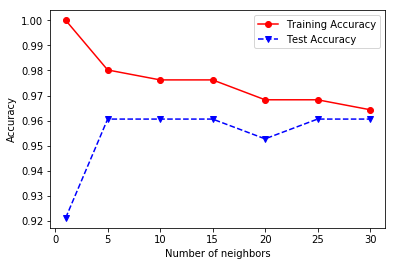

In [281]:
#-----------------------------------------------
# K-NN with Ignored Missing + Managing Outlier
#----------------------------------------------

BD2 = data2.drop(['Class'],axis=1)
BD2['Bare Nuclei'] = pd.to_numeric(BD2['Bare Nuclei'])

#manging
Z_BD2 = (BD2-BD2.mean())/BD2.std()
Z2 = data2.loc[((Z_BD2 > -3).sum(axis=1)==9) & ((Z_BD2 <= 3).sum(axis=1)==9),:]

data2_x = Z2.drop(['Class'],axis=1)
data2_y = Z2['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data2_x, data2_y, test_size = 0.2,random_state = 0)

#---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndD = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndD.append(accuracy_score(Y_test,Y_predTest_knnd2))

#print(Y_predTrain_knnd2)

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndD,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndD)
print(np.mean(testAcc_knndD))

[0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9, 0.9, 0.8888888888888888, 0.9]
0.9000000000000001


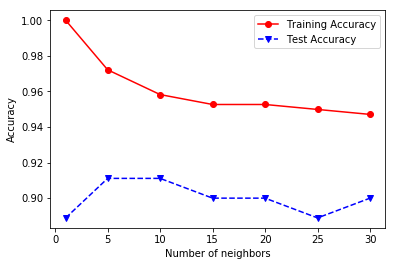

In [280]:
#-----------------------------------------------
# K-NN with Fill-in Missing + Managing Outlier + Managing Duplicate data
#----------------------------------------------

import pandas as pd

dataE = data1.drop_duplicates()

AC1 = dataE.drop(['Class'],axis=1)
AC1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
#manging
Z_AC1 = (AC1-AC1.mean())/AC1.std()
Z1 = dataE.loc[((Z_AC1 > -3).sum(axis=1)==9) & ((Z_AC1 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

#---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndE = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndE.append(accuracy_score(Y_test,Y_predTest_knnd2))

#print(Y_predTrain_knnd2)

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndE,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndE)
print(np.mean(testAcc_knndE))

[0.9080459770114943, 0.9195402298850575, 0.9080459770114943, 0.9080459770114943, 0.896551724137931, 0.896551724137931, 0.896551724137931]
0.9047619047619045


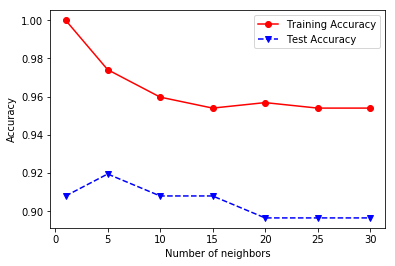

In [279]:
#-----------------------------------------------
# K-NN with  Ignored Missing + Managing Outlier + Managing Duplicate data
#----------------------------------------------

import pandas as pd

dataF = data2.drop_duplicates()

AC1 = dataF.drop(['Class'],axis=1)
AC1['Bare Nuclei'] = pd.to_numeric(data_box_data1['Bare Nuclei'])
#manging
Z_AC1 = (AC1-AC1.mean())/AC1.std()
Z1 = dataF.loc[((Z_AC1 > -3).sum(axis=1)==9) & ((Z_AC1 <= 3).sum(axis=1)==9),:]

data1_x = Z1.drop(['Class'],axis=1)
data1_y = Z1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data1_x, data1_y, test_size = 0.2,random_state = 0)

#---------------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd2 = []
testAcc_knndF = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, Y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd2.append(accuracy_score(Y_train,Y_predTrain_knnd2))
    testAcc_knndF.append(accuracy_score(Y_test,Y_predTest_knnd2))

#print(Y_predTrain_knnd2)

plt.plot(numNeighbors,trainAcc_knnd2,'ro-',numNeighbors,testAcc_knndF,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndF)
print(np.mean(testAcc_knndF))

Text(0, 0.5, 'Accuracy')

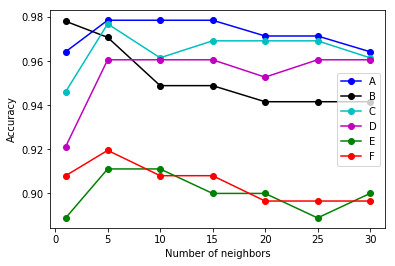

In [275]:
plt.plot(numNeighbors, testAcc_knnd1,'bo-')
plt.plot(numNeighbors,testAcc_knnd2,'ko-')
plt.plot(numNeighbors,testAcc_knndC,'co-')
plt.plot(numNeighbors,testAcc_knndD,'mo-')
plt.plot(numNeighbors,testAcc_knndE,'go-')
plt.plot(numNeighbors,testAcc_knndF,'ro-')

plt.legend(['A','B','C','D','E','F'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')